<a href="https://colab.research.google.com/github/sebastiangs26/Coursera_Capstone/blob/main/Capstone_Week2_Vecindarios_Toronto_NewYork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Capstone: Análisis de los vecindarios de Toronto y Nueva York

## Ciencia de Datos Aplicada - Curso Capstone

###IBM/Coursera

####Integrante: Sebastián Grimberg Saralegui.

##Tabla de contenidos:
* [Introducción](#Introducción)
* [Datos](#Datos)
* [Metodología](#Metodología)
* [Resultados](#Resultados)
* [Análisis](#Análisis)
* [Conclusiones](#Conclusiones)

## Introducción<a name="Introducción"></a>

En este proyecto se propone realizar tanto un análisis descriptivo como así mismo una comparación de los distintos vecindarios de las ciudades capitales de Canadá y de Estados Unidos: Toronto y Nueva York. Primero vamos a observar como están compuestas estas ciudades y luego nos adentramos en el análisis y se buscarán similitudes y diferencias entre los diferentes vecindarios tomando en cuenta los lugares más comunes de  estos y sus categorías correspondientes.
El informe se encuentra dirigido a una agencia de viajes interesada en recabar información acerca de estos dos grandiosos destinos como parte de un estudio de mercado.

## Datos<a name="Datos"></a>

* [Primer etapa de recolección:](#primer) Obtenemos los datos geoespaciales correspondientes a los municipios y sus respectivos vecindarios de cada una de las ciudades. Luego aplicamos la integración de los datos de ambas ciudades para tenerlos en una sola tabla.
* [Segunda etapa de recolección:](#segunda) Obtenemos los datos de sitios en los distintos vecindarios a través de la API de Foursquare.


###Primer etapa de recolección<a name="primer"></a>

* [Datos geoespaciales de los vecindarios de Toronto](#Toronto)
* [Datos geoespaciales de los vecindarios de Nueva York](#NY)
* [Datos geoespaciales de los vecindarios de las dos ciudades: Toronto y Nueva York](#Toronto_NY)
* [Descripción y visualización de los datos](#Desc)

In [1]:
#Importamos librería pandas
import pandas as pd

####Datos geoespaciales de los vecindarios de Toronto<a name="Toronto"></a>

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
W_Postal_Codes = pd.read_html(url)

In [3]:
df_OriginalTable = W_Postal_Codes[0]

In [4]:
#Separamos Códigos Postales y descripción de Municipios y Vecindarios
City = []
Code = []
Desc = []
for index, row in df_OriginalTable.iterrows():  #recorrer filas
  for x in row:        #recorrrer cada celda 
    Code.append(x[:3]) #obtener lista con los Coódigos Postales
    Desc.append(x[3:]) #lista de descripción de Municipios y Vecindarios
    City.append('Toronto')

In [5]:
#Creamos un nuevo DataFrame con las 2 listas obtenidas
df_ReorganizedTable = pd.DataFrame()
df_ReorganizedTable['City'] = City
df_ReorganizedTable['PostalCode'] = Code
df_ReorganizedTable['Description'] = Desc

In [6]:
#Eliminamos todas las filas donde hay valores 'Not assigned' en la descripción
df_ReorganizedTableClean = df_ReorganizedTable.loc[(df_ReorganizedTable != 'Not assigned').all(axis=1), :]
#Luego de eliminar filas reindexamos
df_ReorganizedTableClean.reset_index(drop=True, inplace=True)

In [7]:
# Separamos Municipios de Vecindarios 
Bor_Neigh = df_ReorganizedTableClean.Description.str.split('(',expand=True)
# Reemplazamos los simbolos de '/' por el de ','
Bor_Neigh[1] = Bor_Neigh[1].str.replace('/',',')
# Reemplazamos los simbolos de ')' por el de '' 
Bor_Neigh[1] = Bor_Neigh[1].str.replace(')','')
Bor_Neigh.columns = ['Borough','Neighborhood','None']
Bor_Neigh.drop(['None'], axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [8]:
#Obtenemos tabla final con las 3 columnas 'PostalCode','Borough'y'Neighborhood' 
df_data1 = pd.DataFrame()
df_data1 ['City'] = df_ReorganizedTableClean ['City']
df_data1 ['PostalCode'] = df_ReorganizedTableClean ['PostalCode']
df_data1 [['Borough','Neighborhood']] = Bor_Neigh

In [9]:
#descargamos archivo csv con los datos geoespaciales
!wget -O Geospatial_data.csv http://cocl.us/Geospatial_data

--2022-08-13 14:22:16--  http://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 23.64.119.173, 23.64.119.191, 2600:1404:dc00::6858:cc60, ...
Connecting to cocl.us (cocl.us)|23.64.119.173|:80... connected.
HTTP request sent, awaiting response... 308 Permanent Redirect
Location: https://cocl.us/geospatial_data [following]
--2022-08-13 14:22:16--  https://cocl.us/geospatial_data
Connecting to cocl.us (cocl.us)|23.64.119.173|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2022-08-13 14:22:17--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.29.197
Connecting to ibm.box.com (ibm.box.com)|107.152.29.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2022-08-13 14:22:17--  https://i

In [10]:
Geospatial_data = pd.read_csv('Geospatial_data.csv')
Geospatial_data = Geospatial_data.rename(columns={'Postal Code':'PostalCode'})

In [11]:
#Utilizamos columna en común de las dos tablas 'PostalCode' para poder unirlas
df_data2 = pd.merge(df_data1, Geospatial_data, on ='PostalCode')
#Eliminamos columna 'PostalCode'
data_To = df_data2.drop(['PostalCode'], axis=1)

####Datos geoespaciales de los vecindarios de Nueva York<a name="NY"></a>

In [12]:
#Importamos librería json
import json

In [13]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [14]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [15]:
neighborhoods_data = newyork_data['features']

In [16]:
# definir las columnas del datagrama
column_names = ['City','Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# inicializar el dataframe
data_NY = pd.DataFrame(columns=column_names)

In [17]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    data_NY = data_NY.append({'City' :'Nueva York',
                              'Borough': borough,
                              'Neighborhood': neighborhood_name,
                              'Latitude': neighborhood_lat,
                              'Longitude': neighborhood_lon,
                              }, ignore_index=True)

####Datos geoespaciales de los vecindarios de las dos ciudades: Toronto y Nueva York<a name="Toronto_NY"></a>

In [21]:
#Unimos las filas de las dos tablas
data = data_To.append(data_NY, ignore_index=True)

In [22]:
#Primeras filas de la tabla data
data.head()

,City,Borough,Neighborhood,Latitude,Longitude
0,Toronto,North York,Parkwoods,43.753259,-79.329656
1,Toronto,North York,Victoria Village,43.725882,-79.315572
2,Toronto,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,Toronto,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,Toronto,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [23]:
#Ultimas filas de la tabla data
data.tail()

,City,Borough,Neighborhood,Latitude,Longitude
404,Nueva York,Manhattan,Hudson Yards,40.756658,-74.000111
405,Nueva York,Queens,Hammels,40.587338,-73.805530
406,Nueva York,Queens,Bayswater,40.611322,-73.765968
407,Nueva York,Queens,Queensbridge,40.756091,-73.945631
408,Nueva York,Staten Island,Fox Hills,40.617311,-74.081740


####Descripción y visualización de los datos<a name="Desc"></a>

#####Cantidad de vecindarios en cada ciudad:

In [32]:
#Cantidad de vecindarios en cada ciudad
NeigNY_count = data['City'].value_counts()[0]
NeigTo_count = data['City'].value_counts()[1]
print('Cantidad de vecindarios en Toronto: {} '.format(NeigTo_count))
print('Cantidad de vecindarios en New York: {} '.format(NeigNY_count))

                                                             

Cantidad de vecindarios en Toronto: 103 
Cantidad de vecindarios en New York: 306 


#####Tablas de distribución de los vecindarios dentro de los municipios de cada ciudad

######En Toronto:

In [33]:
Neigh_counts_To = data[data['City']=='Toronto']['Borough'].value_counts().rename_axis('Toronto Borough').reset_index(name='Neighborhood counts')
Neigh_counts_To

,Toronto Borough,Neighborhood counts
0,North York,24
1,Downtown Toronto,17
2,Scarborough,17
3,Etobicoke,11
4,Central Toronto,9
5,West Toronto,6
6,York,5
7,East York,4
8,East Toronto,4
9,Queen's Park,1


In [34]:
Neigh_counts_To_describe = Neigh_counts_To.describe().rename_axis('Measures').reset_index()
Neigh_counts_To_describe

,Measures,Neighborhood counts
0,count,15.000000
1,mean,6.866667
2,std,7.308182
3,min,1.000000
4,25%,1.000000
5,50%,4.000000
6,75%,10.000000
7,max,24.000000


######En Nueva York:

In [35]:
Neigh_counts_NY = data[data['City']=='Nueva York']['Borough'].value_counts().rename_axis('Nueva York Borough').reset_index(name='Neighborhood counts')
Neigh_counts_NY

,Nueva York Borough,Neighborhood counts
0,Queens,81
1,Brooklyn,70
2,Staten Island,63
3,Bronx,52
4,Manhattan,40


In [36]:
Neigh_counts_NY_describe = Neigh_counts_NY.describe().rename_axis('Measures').reset_index()
Neigh_counts_NY_describe 

,Measures,Neighborhood counts
0,count,5.000000
1,mean,61.200000
2,std,15.865056
3,min,40.000000
4,25%,52.000000
5,50%,63.000000
6,75%,70.000000
7,max,81.000000


In [37]:
#Medias de vecindarios por municipio en cada ciudad
Neigh_counts_To_describe_mean = Neigh_counts_To_describe[Neigh_counts_To_describe['Measures']=='mean']['Neighborhood counts'][1] 
Neigh_counts_NY_describe_mean = Neigh_counts_NY_describe[Neigh_counts_NY_describe['Measures']=='mean']['Neighborhood counts'][1] 
print('La media de vecindarios por municipio en Toronto es: {} '.format(Neigh_counts_To_describe_mean))
print('La media de vecindarios por municipio en New York es: {} '.format(Neigh_counts_NY_describe_mean))

La media de vecindarios por municipio en Toronto es: 6.866666666666666 
La media de vecindarios por municipio en New York es: 61.2 


#####Gráficos de barras de distruibuciones de vecindarios en los municipios de las dos ciudades

En Toronto:


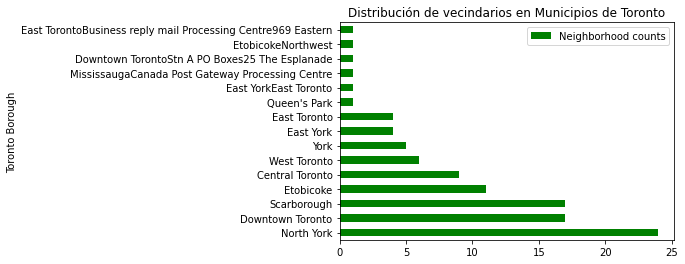

In [38]:
print('En Toronto:')
Neigh_counts_To.plot.barh(x='Toronto Borough', y='Neighborhood counts', 
             title='Distribución de vecindarios en Municipios de Toronto', color='green')

En Nueva York:


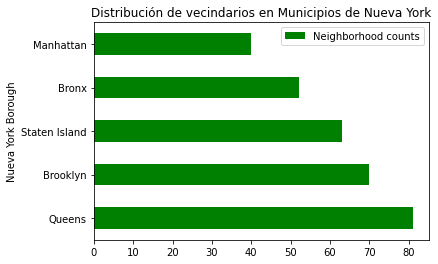

In [39]:
print('En Nueva York:')
Neigh_counts_NY.plot.barh(x='Nueva York Borough', y='Neighborhood counts', 
             title='Distribución de vecindarios en Municipios de Nueva York', color='green')

#####Diagramas de cajas con distribuciones de vecindarios en los municipios de las dos ciudades

En Toronto:


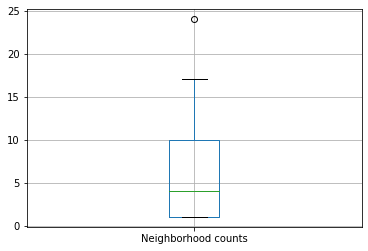

In [42]:
print('En Toronto:')
boxplot_Neigh_counts_To = Neigh_counts_To.boxplot(column=['Neighborhood counts'])

En Nueva York:


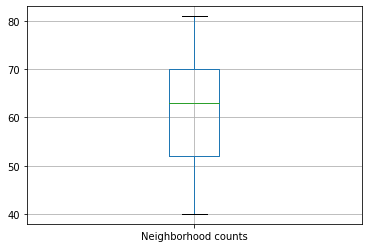

In [43]:
print('En Nueva York:')
boxplot_Neigh_counts_NY = Neigh_counts_NY.boxplot(column=['Neighborhood counts'])

###Segunda etapa de recolección<a name="segunda"></a>

In [44]:
#Importamos librería request
import requests

In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name, lat, lng)
            
        # crear la URL de solicitud de API
        url = "https://api.foursquare.com/v3/places/search?ll={}%2C{}&radius={}&limit=50".format(lat, lng, radius)

        headers = {
            "Accept": "application/json",
            "Authorization": "fsq32FQVR4rb8gN38EX8nw9vXYrjR0D874DdIeTTJtHhEWU="
                }

        response = requests.get(url, headers=headers)
        results = json.loads(response.text)["results"]
        # regresa solo información relevante de cada sitio cercano
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['geocodes']['main']['latitude'], 
            v['geocodes']['main']['longitude'],  
            v['categories'][0]['name']) for v in results if len(v['categories'])>0 and len(v['geocodes'])>0])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [46]:
To_NY_venues = getNearbyVenues( data["Neighborhood"], data["Latitude"], data["Longitude"])

Parkwoods 43.7532586 -79.3296565
Victoria Village 43.7258823 -79.3155716
Regent Park , Harbourfront 43.6542599 -79.3606359
Lawrence Manor , Lawrence Heights 43.718518 -79.4647633
Ontario Provincial Government 43.6623015 -79.3894938
Islington Avenue 43.6678556 -79.5322424
Malvern , Rouge 43.8066863 -79.1943534
Don MillsNorth 43.7459058 -79.352188
Parkview Hill , Woodbine Gardens 43.7063972 -79.309937
Garden District, Ryerson 43.6571618 -79.3789371
Glencairn 43.709577 -79.4450726
West Deane Park , Princess Gardens , Martin Grove , Islington , Cloverdale 43.6509432 -79.5547244
Rouge Hill , Port Union , Highland Creek 43.7845351 -79.1604971
Don MillsSouth 43.7258997 -79.340923
Woodbine Heights 43.6953439 -79.3183887
St. James Town 43.6514939 -79.3754179
Humewood-Cedarvale 43.6937813 -79.4281914
Eringate , Bloordale Gardens , Old Burnhamthorpe , Markland Wood 43.6435152 -79.5772008
Guildwood , Morningside , West Hill 43.7635726 -79.1887115
The Beaches 43.6763574 -79.2930312
Berczy Park 43.6

Hemos obtenido los distintos sitios en los vecindarios de Toronto y de Nueva York y tenemos los datos de ubicación. En total tenemos los datos de 17791 sitios correspondientes a ambas ciudades. 

Visualizamos las primeras filas de la tabla:

In [47]:
To_NY_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.754751,-79.328439,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751978,-79.333389,Food and Beverage Retail
2,Parkwoods,43.753259,-79.329656,Money in Motion,43.752947,-79.332418,Financial Service
3,Parkwoods,43.753259,-79.329656,Toronto Custom Lights,43.752947,-79.332418,Business and Professional Services
4,Parkwoods,43.753259,-79.329656,Pneutrans Systems Ltd,43.754856,-79.327753,Business and Professional Services


In [54]:
To_NY_venues.shape

(17791, 7)

##Metodología<a name="Metodología"></a>

In [48]:
#Revisamos cuantos sitios se regresarón para cada barrio
Sitios_count = To_NY_venues.groupby('Neighborhood').count()
Sitios_count = Sitios_count.sort_values('Venue',ascending=False)
Sitios_count.reset_index(inplace=True)
Sitios_count.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Murray Hill,100,100,100,100,100,100
1,Bay Terrace,96,96,96,96,96,96
2,Chelsea,88,88,88,88,88,88
3,Sunnyside,87,87,87,87,87,87
4,Rosedale,72,72,72,72,72,72


In [49]:
#Analizamos cada barrio
# codificación
To_NY_onehot = pd.get_dummies(To_NY_venues[['Venue Category']], prefix="", prefix_sep="")

# añadir la columna de barrio de regreso al dataframe
To_NY_onehot['Neighborhood'] = To_NY_venues['Neighborhood'] 

# mover la columna de barrio a la primer columna
fixed_columns = [To_NY_onehot.columns[-1]] + list(To_NY_onehot.columns[:-1])
To_NY_onehot = To_NY_onehot[fixed_columns]

To_NY_onehot.head()

,Neighborhood,ATM,Accounting and Bookkeeping Service,Addiction Treatment Center,Adult Store,Advertising Agency,Afghan Restaurant,African Restaurant,Agriculture and Forestry Service,Airport Service,...,Welding Service,Whisky Bar,Wholesaler,Wine Bar,Wine Store,Wings Joint,Women's Store,Yoga Studio,Youth Organization,Zoo
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#Agrupamos las filas por barrios tomando la média de la frecuancia de la ocurrencia de cada categoría
To_NY_grouped = To_NY_onehot.groupby('Neighborhood').mean().reset_index()
To_NY_grouped.head()

,Neighborhood,ATM,Accounting and Bookkeeping Service,Addiction Treatment Center,Adult Store,Advertising Agency,Afghan Restaurant,African Restaurant,Agriculture and Forestry Service,Airport Service,...,Welding Service,Whisky Bar,Wholesaler,Wine Bar,Wine Store,Wings Joint,Women's Store,Yoga Studio,Youth Organization,Zoo
0,Agincourt,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,"Alderwood , Long Branch",0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,Allerton,0.00,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,Annadale,0.00,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.0
4,Arden Heights,0.05,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [51]:
#Función para ordenar los sitios en orden descendente
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [52]:
#Importamos librería numpy
import numpy as np

In [53]:
#Generemos el nuevo dataframe y mostremos los primeros 10 sitios de cada barrio
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# crear las columnas acorde al numero de sitios populares
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# crear un nuevo dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = To_NY_grouped['Neighborhood']

for ind in np.arange(To_NY_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(To_NY_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Clothing Store,Real Estate Agency,Home Improvement Service,Restaurant,Painter,Sporting Goods Retail,Business and Professional Services,General Contractor,Latin American Restaurant,Financial Service
1,"Alderwood , Long Branch",Business and Professional Services,Used Car Dealership,Plumber,Clothing Store,Home Improvement Service,Bank,Automotive Repair Shop,Photography Service,Fruit and Vegetable Store,Dance Studio
2,Allerton,General Contractor,Real Estate Agency,Pizzeria,Drugstore,Spa,Automotive Repair Shop,Grocery Store / Supermarket,Chinese Restaurant,American Restaurant,Health and Beauty Service
3,Annadale,Attorney / Law Office,Pizzeria,Hair Salon,General Contractor,Audiovisual Service,Bagel Shop,Diner,Cocktail Bar,Accounting and Bookkeeping Service,Photographer
4,Arden Heights,General Contractor,Business and Professional Services,Mover,"Heating, Ventilating and Air Conditioning Cont...",Audiovisual Service,Real Estate Agency,Real Estate Service,Playground,Carpet and Flooring Contractor,Nutritionist


**Análisis de Cluster para agrupar vecindarios de Toronto y New York** 

In [ ]:
# importamos k-means desde la fase de agrupación
from sklearn.cluster import KMeans

In [ ]:
# establecer el número de agrupaciones
kclusters = 6

To_NY_grouped_clustering = To_NY_grouped.drop('Neighborhood', 1)

# ejecutar k-means
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(To_NY_grouped_clustering)

# revisar las etiquetas de las agrupaciones generadas para cada fila del dataframe
kmeans.labels_[0:10] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


array([0, 0, 0, 4, 2, 0, 0, 0, 1, 0], dtype=int32)

In [ ]:
#Generemos un nuevo dataframe que incluya la agrupación asi como los 10 sitios mas populares de cada barrio
# añadir etiquetas
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

To_NY_merged = data

# juntar manhattan_grouped con manhattan_data 
To_NY_merged = To_NY_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [ ]:
#Primeras filas de la tabla To_NY_merged 
To_NY_merged.head()

,City,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Toronto,North York,Parkwoods,43.753259,-79.329656,3,Business and Professional Services,Accounting and Bookkeeping Service,Community and Government,Financial Service,Engineer,Vintage and Thrift Store,Landscaper and Gardener,Food and Beverage Retail,Audiovisual Service,Website Designer
1,Toronto,North York,Victoria Village,43.725882,-79.315572,0,Car Dealership,Print Store,General Contractor,Media Agency,Organization,Automotive Repair Shop,Doors and Windows Contractor,Gift Store,Nail Salon,Furniture and Home Store
2,Toronto,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,1,Car Dealership,Automotive Repair Shop,Furniture and Home Store,Restaurant,Park,Bakery,Music Venue,Coffee Shop,Italian Restaurant,Flower Store
3,Toronto,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763,0,Clothing Store,Event Service,Housewares Store,Automotive Repair Shop,General Contractor,Attorney / Law Office,Import and Export Service,Loans Agency,Children's Clothing Store,Retail
4,Toronto,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,1,Café,Diner,"Cafes, Coffee, and Tea Houses",Italian Restaurant,Bank,Deli,Coffee Shop,Hair Salon,Sushi Restaurant,Fried Chicken Joint


In [ ]:
#Ultimas filas de la tabla To_NY_merged
To_NY_merged.tail()

,City,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
404,New York,Manhattan,Hudson Yards,40.756658,-74.000111,1,Restaurant,American Restaurant,Grocery Store / Supermarket,Coffee Shop,Cocktail Bar,Café,Art Gallery,Park,Automotive Repair Shop,Food Truck
405,New York,Queens,Hammels,40.587338,-73.805530,0,Beach,Playground,Used Car Dealership,Community and Government,Dog Park,Real Estate Agency,Building and Land Surveyor,Surf Spot,Sports and Recreation,Carpet and Flooring Contractor
406,New York,Queens,Bayswater,40.611322,-73.765968,0,Playground,"Heating, Ventilating and Air Conditioning Cont...",Pest Control Service,General Contractor,Restaurant,Travel Agency,Government Department / Agency,Jewelry Store,Accounting and Bookkeeping Service,Organization
407,New York,Queens,Queensbridge,40.756091,-73.945631,4,Deli,Automotive Repair Shop,Playground,Print Store,Storage Facility,Grocery Store / Supermarket,Chinese Restaurant,Management Consultant,Pawn Shop,Food and Beverage Retail
408,New York,Staten Island,Fox Hills,40.617311,-74.081740,0,Grocery Store / Supermarket,ATM,Business and Professional Services,General Contractor,Organization,Electrician,Business and Strategy Consulting Office,Dining and Drinking,Professional Cleaning Service,BBQ Joint


In [ ]:
# librería para graficar mapas
import folium  

# convertir una dirección en valores de latitud y longitud
from geopy.geocoders import Nominatim


# Matplotlib y módulos asociados para graficar
import matplotlib.cm as cm
import matplotlib.colors as colors

In [ ]:
# Observar vecindarios en Toronto

address = 'Toronto'

geolocator = Nominatim(user_agent="Tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [ ]:
 #Visualicemos las agrupaciones resultantes
 # crear mapa
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# establecer el esquema de color para las agrupaciones
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# añadir marcadores al mapa
markers_colors = []
for lat, lon, poi, cluster in zip(To_NY_merged['Latitude'], To_NY_merged['Longitude'], To_NY_merged['Neighborhood'], To_NY_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
# Observar vecindarios en New York

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [ ]:
 #Visualicemos las agrupaciones resultantes
 # crear mapa
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# establecer el esquema de color para las agrupaciones
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# añadir marcadores al mapa
markers_colors = []
for lat, lon, poi, cluster in zip(To_NY_merged['Latitude'], To_NY_merged['Longitude'], To_NY_merged['Neighborhood'], To_NY_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters